In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


In [4]:
columns= ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
 'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
 sep='\t',
 usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [5]:
df.shape
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [6]:
df.isnull().sum()
df=df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

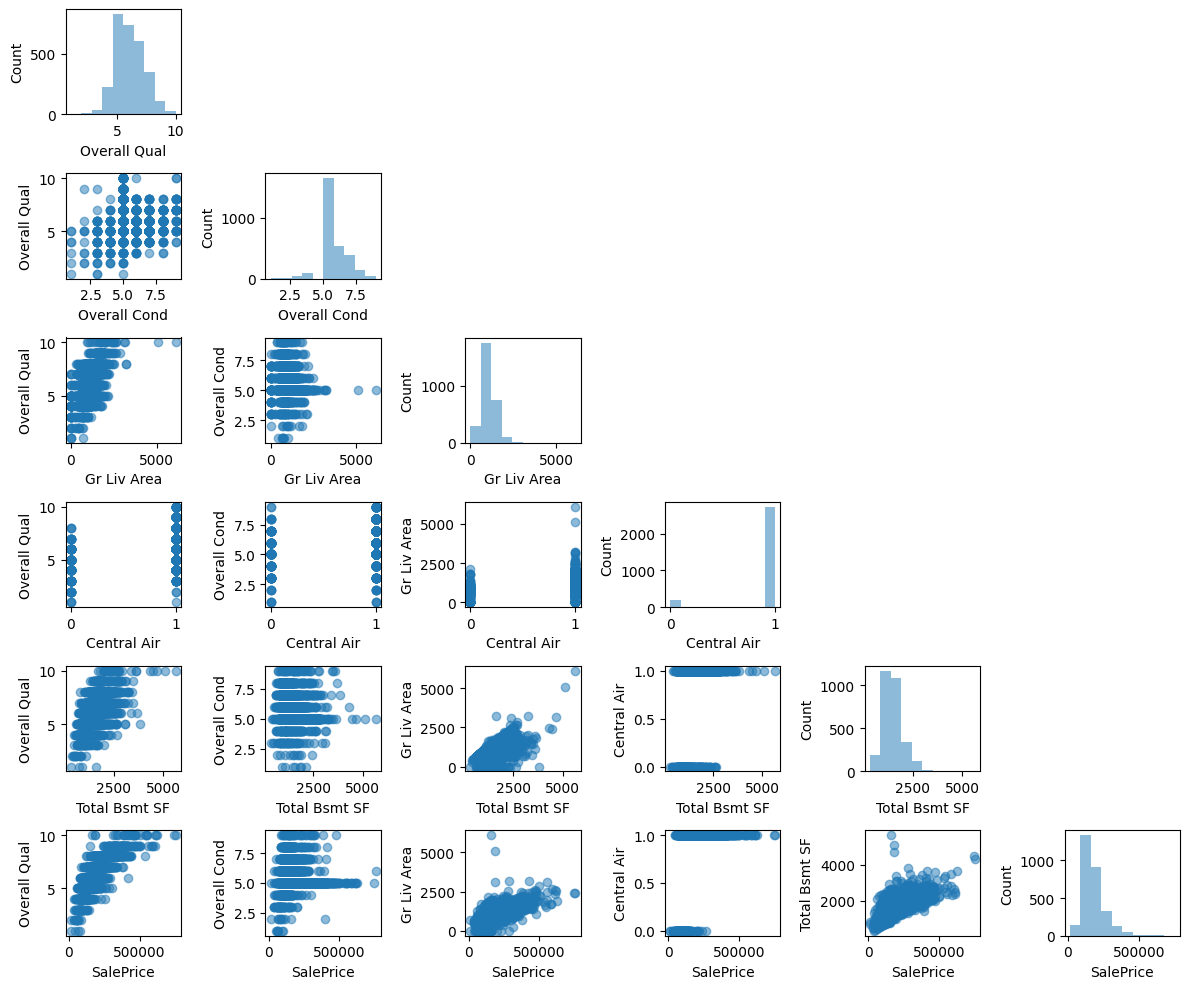

In [7]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(12, 10), names=columns, alpha=0.5)
plt.tight_layout()

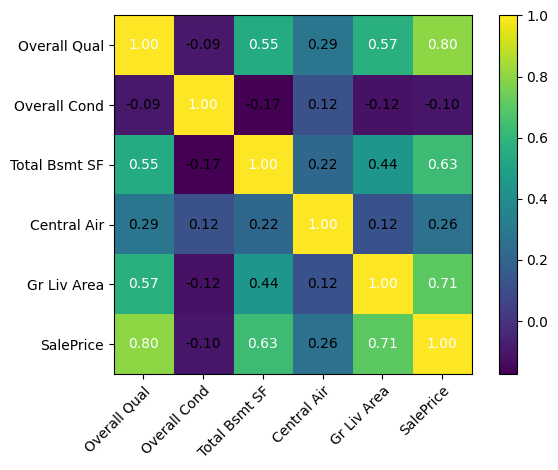

In [8]:
# plot the correlation matrix
from mlxtend.plotting import heatmap
cm= np.corrcoef(df.values.T)
hm=heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()


In [24]:
# Outliers detection using RANSAC algorithm
from sklearn.linear_model import LinearRegression, RANSACRegressor

X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
ransac=RANSACRegressor(
    LinearRegression(),
    max_trials=100,
    min_samples=.95,
    residual_threshold=5000, # if you want few data points to be considered as outliers, increase this value
    random_state=125
)
ransac.fit(X,y)



RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=125, residual_threshold=500000)

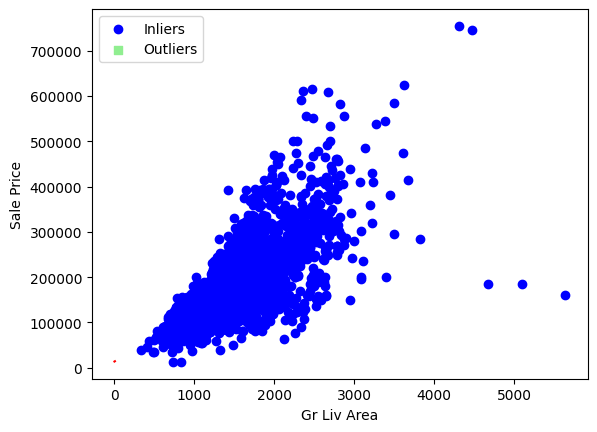

In [25]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)
line_X=np.arange(3,10,1)
line_y_ransac=ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inlier_mask],y[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='lightgreen',marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='red')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.legend(loc='upper left')
plt.show()


In [14]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 106.413
Intercept: 20183.553


In [27]:
from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123) 
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


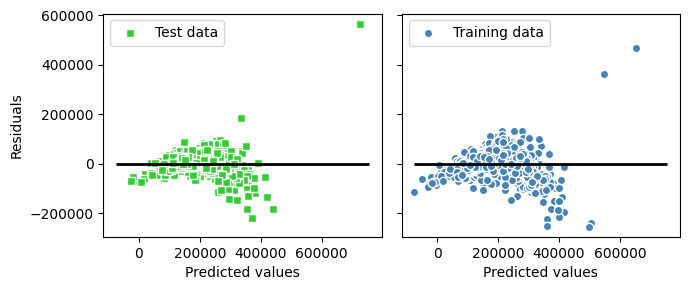

In [28]:
# Residual plot
x_max=np.max([np.max(y_train_pred),np.max(y_train)])
x_min=np.min([np.min(y_train_pred),np.min(y_train)])

fig, (ax1, ax2) = plt.subplots(
1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(
y_test_pred, y_test_pred - y_test,
c='limegreen', marker='s',
edgecolor='white',
label='Test data')
ax2.scatter(
y_train_pred, y_train_pred - y_train,
c='steelblue', marker='o', edgecolor='white',
label='Training data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,\
    color='black', lw=2)
plt.tight_layout()
plt.show()